In [1]:
import pandas as pd

In [2]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import ggplot as ggp
from sklearn.model_selection import train_test_split


C:\Users\RITABRITA\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\RITABRITA\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\RITABRITA\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
Data_main=pd.read_csv(filepath_or_buffer='C:\loan_data.csv')


In [6]:
np.sum(Data_main.isnull())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

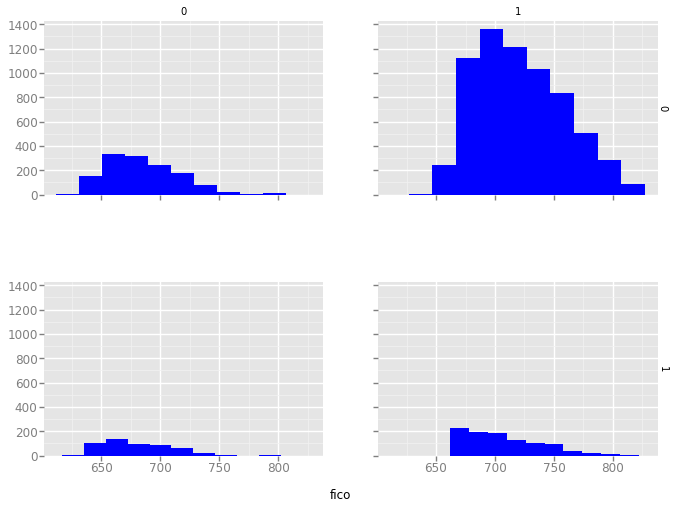

<ggplot: (144668817079)>

In [7]:
#we shall start EDA and  dividing training and testing data(clean)
ggp.ggplot(Data_main,ggp.aes(x='fico'))+ggp.geom_density(color='red')+ggp.geom_histogram(fill='blue')+ggp.facet_grid('not.fully.paid','credit.policy')


In [8]:
Data_main.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [11]:
y=Data_main['not.fully.paid']
X=Data_main.drop('not.fully.paid',axis=1)
y.shape,X.shape

((9578,), (9578, 13))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((6704, 13), (2874, 13), (2874,), (6704,))

In [14]:
from sklearn import preprocessing

In [16]:
X_scaledTest=preprocessing.scale(X_test[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']])
X_scaledTrain=preprocessing.scale(X_train[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']])

In [17]:
X_scaledTrain.mean()

-3.9227559028033577e-17

In [19]:
#Lets put the model now
model=svm.SVC(kernel='linear',C=1,gamma=1)

In [21]:
model.fit(X_scaledTrain,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
#Checking the model's accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_scaledTest))
cnf_matrix = confusion_matrix(y_test, predicted)  
print(cnf_matrix)

[[2392    2]
 [ 478    2]]


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [26]:
#Hence we can see that accuracy comes out to be 83.29%
#Lets see if svm tuning help increasing the accuracy
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


In [27]:
#Try running on rbf kernel
model_T=svm.SVC(kernel='rbf',C=1,gamma=1)

In [29]:
model_T.fit(X_scaledTrain,y_train)
accuracy_score(y_test,model_T.predict(X_scaledTest))

0.83368128044537226

In [34]:
#Tune the model using Gridsearch
from sklearn.model_selection import GridSearchCV 





In [37]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              [0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}



In [39]:
tune_model = GridSearchCV(svm.SVC(), parameters)


In [42]:
tune_model.fit(X_scaledTrain,y_train)
predicted = tune_model.predict(X_scaledTest)



In [43]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)


[[2392    2]
 [ 478    2]]


In [44]:
accuracy_score(y_test,tune_model.predict(X_scaledTest))

0.83298538622129437